<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DL/%EC%97%AC%EB%9F%AC%20%EC%9D%98%EC%83%81%20%EC%82%AC%EC%A7%84%EC%97%90%EC%84%9C%20%EC%98%B7%20%EC%A2%85%EB%A5%98%20%EA%B5%AC%EB%B6%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal :
 - fashion MNIST 이미지를 분류하기
 - Multi-Class & Multi-Label 구분
   - 하나의 사진에 여러 객체가 있을 때 // ex) 한 사진안에 고양이와 독수리가 있을 때 이를 새, 고양이로 분류하는 것
 - 이미지 확장, 이미지에 객체 삽입

## Library

In [7]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image
from google.colab import drive

warnings.filterwarnings('ignore')

SEED=34

## 도입전 기본 처리

In [8]:
# fashion MNIST 데이터를 살펴보자
fashion_mnist = keras.datasets.fashion_mnist
((train_images,train_labels),(test_images, test_labels)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [162]:
# label을 설정해보자 
# 0이 뭔지 1이 뭔지 모르겠음...
labels = ["T-shirt/top",   #idx 0
          "Trouser",       #idx 1
          "Pullover",      #idx 2
          "Dress",         #idx 3
          "Coat",          #idx 4
          "Sandal",        #idx 5
          "Shirt",         #idx 6
          "Sneaker",       #idx 7
          "Bag",           #idx 8
          "Ankle_boot"]    #idx 9

In [163]:
def idx2label(idx) :
  return labels[idx]

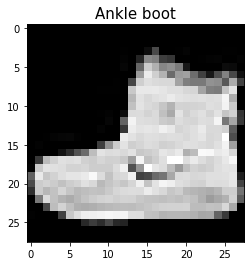


Ankle boot


In [40]:
# plt로 형태를 출력해보자

plt.imshow(train_images[0], cmap='gray')
plt.title(idx2label(train_labels[0]), size=15)
plt.show()
print('')
print(idx2label(train_labels[0]))

In [44]:
# 이걸 함수로 만들어 볼까

def train_show(idx) :
  plt.imshow(train_images[idx], cmap='gray')
  plt.title(idx2label(train_labels[idx]), size=20)
  plt.show()

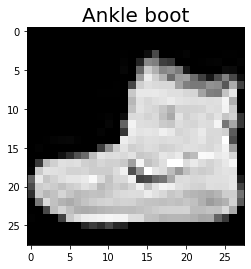

In [117]:
train_show(0)

In [50]:
# train images에서 0이 아닌 값들을 찾아보자

train_images[train_images != 0]

array([ 1, 13, 73, ..., 42, 21, 18], dtype=uint8)

In [51]:
# 이미지의 값이 가장 큰 idx 와 가장 작은 idx를 찾아보자
train_images.reshape((60000,-1)).shape

(60000, 784)

In [55]:
print(train_images.reshape((60000,-1)).sum(axis=1).argmax()) #최대값
print(train_images.reshape((60000,-1)).sum(axis=1).argmin()) #최소값

55023
9230


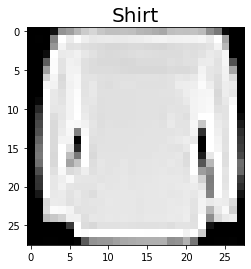

In [56]:
train_show(train_images.reshape((60000,-1)).sum(axis=1).argmax())

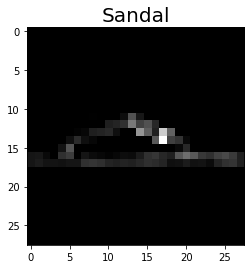

In [57]:
train_show(train_images.reshape((60000,-1)).sum(axis=1).argmin())

## PreProcessing

In [61]:
# Train, Test 이미지 데이터 범위 확인
print(train_images.max(), train_images.min())
print(test_images.max(), test_images.min())

255 0
255 0


In [64]:
print(train_images.dtype)
print(test_images.dtype)

uint8
uint8


In [65]:
train_images = train_images.astype(np.float64)
test_images = test_images.astype(np.float64)

In [66]:
# 데이터 정규화

train_images = train_images / 255
test_images = test_images / 255

In [67]:
# 함수로 구현하면 이런 느낌
def norm(data) :
  min_v = data.min()
  max_v = data.max()
  return (data - min_v)/(max_v - min_v)

In [69]:
norm(train_images).min(), norm(train_images).max()

(0.0, 1.0)

## Visualizing

### random

In [157]:
# 랜덤으로 n장을 가져오고 그것의 plt를 그린 후 label까지 불러와보자.
def draw(n) : 
  label_list = []
  idx = list(np.random.randint(0,60001,n))
  pic_n = train_images[idx].transpose((1,0,2)).reshape((28,-1))
  plt.figure(figsize=(10+(n/2), 12))
  plt.imshow(pic_n,cmap='gray')
  plt.show()

  for i in idx :
    label_list.append(idx2label(train_labels[i]))
  print('')
  for j in label_list :
    print(j, sep=' ', end= ' ')
#train_images[list(np.random.randint(0,60000,5))].shape
#np.random.randin

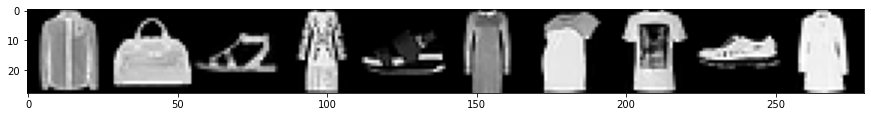


Coat Bag Sandal Dress Sandal Dress Shirt T-shirt/top Sandal Coat 

In [165]:
draw(10)

### Standard

In [94]:
# (5,28,28) 획득하기
train_images[:5].shape

(5, 28, 28)

In [98]:
# (28,28*5)로 변환하자
train_images[:5].transpose((1,0,2)).reshape((28,-1)).shape

(28, 140)

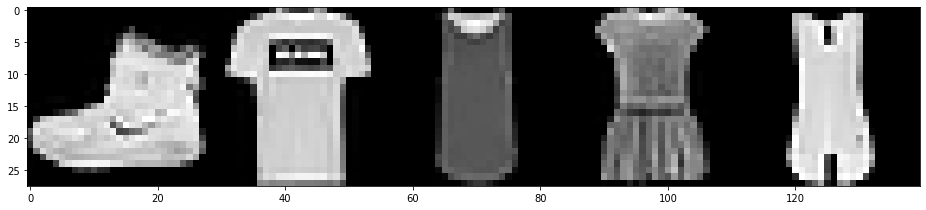

In [115]:
plt.figure(figsize=(16,12))
plt.imshow(train_images[:5].transpose((1,0,2)).reshape((28,-1)),cmap='gray')
plt.show()


In [ ]:
# 레이블에 따라